<a href="https://colab.research.google.com/github/andBabaev/ds_school_2020/blob/master/task%201/Group6_Babaev_visual_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json
from scipy import stats

[TMDB 5000 Movie Dataset](https://www.kaggle.com/tmdb/tmdb-movie-metadata#tmdb_5000_movies.csv) was selected (tmdb_5000_movies.csv).

Let's read data

In [2]:
raw_data = pd.read_csv('drive/My Drive/tmdb_5000_movies.csv')
raw_data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

Integer features: 

*   revenue - target variable
*   budget
*   id
*   vote_count

Real features:

*   popularity
*   runtime
*   vote_average

Categorical features:

*   original_language
*   original_title
*   title
*   status

Processing required

*   genres
*   keywords
*   production_companies
*   production_countries
*   spoken_languages
*   release_date

Non_structured data

*   tagline
*   overview
*   homepage









# Data clearning

In [4]:
#delete unstructured data
raw_data = raw_data.drop(['tagline', 'overview', 'homepage', 'original_title', 'title'], axis=1)
raw_data.shape

(4803, 15)

In [5]:
print('Numbers of moves with runtime=0', raw_data[raw_data['runtime']==0.0].shape[0])
print('Numbers of moves with budget=0', raw_data[raw_data['budget']==0.0].shape[0])
print('Numbers of moves with vote_count=0', raw_data[raw_data['vote_count']==0.0].shape[0])
print('Numbers of moves with revenue=0', raw_data[raw_data['revenue']==0.0].shape[0])

Numbers of moves with runtime=0 35
Numbers of moves with budget=0 1037
Numbers of moves with vote_count=0 62
Numbers of moves with revenue=0 1427


In [0]:
raw_data = raw_data[(raw_data['runtime']!=0.0) &
                    (raw_data['revenue']!=0.0)]

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3375 entries, 0 to 4798
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                3375 non-null   int64  
 1   genres                3375 non-null   object 
 2   id                    3375 non-null   int64  
 3   keywords              3375 non-null   object 
 4   original_language     3375 non-null   object 
 5   popularity            3375 non-null   float64
 6   production_companies  3375 non-null   object 
 7   production_countries  3375 non-null   object 
 8   release_date          3375 non-null   object 
 9   revenue               3375 non-null   int64  
 10  runtime               3375 non-null   float64
 11  spoken_languages      3375 non-null   object 
 12  status                3375 non-null   object 
 13  vote_average          3375 non-null   float64
 14  vote_count            3375 non-null   int64  
dtypes: float64(3), int64(

no missing values in the data

# Numerical data

In [8]:
raw_data.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,3.375000e+03,3375.000000,3375.000000,3.375000e+03,3375.000000,3375.000000,3375.000000
mean,3.889576e+07,45512.592000,28.268826,1.170653e+08,110.414815,6.309333,944.701333
std,4.420638e+07,74735.608756,35.624349,1.834997e+08,21.033516,0.881731,1392.958700
min,0.000000e+00,5.000000,0.019984,5.000000e+00,41.000000,0.000000,0.000000
25%,8.500000e+06,5526.500000,9.967348,1.536924e+07,96.000000,5.800000,161.000000
50%,2.500000e+07,11577.000000,19.760383,5.180119e+07,106.000000,6.300000,441.000000
75%,5.200000e+07,47207.500000,36.428157,1.401684e+08,121.000000,6.900000,1091.500000
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


Data has a different scale; scaling will be required

In [0]:
def get_columns_by_type(target_types, exclusion=[]):
    types = raw_data.dtypes
    return [name for name, type_ in types.items() if type_ in target_types and name not in exclusion]

numerical_col = get_columns_by_type(['int64', 'float64'])[:7]

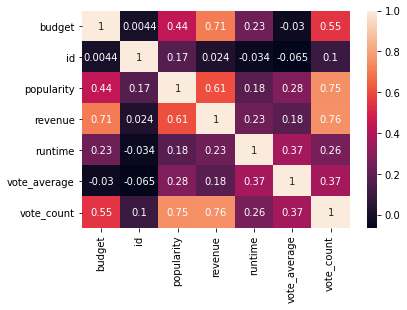

In [10]:
sns.heatmap(raw_data[numerical_col].corr(), annot=True,);

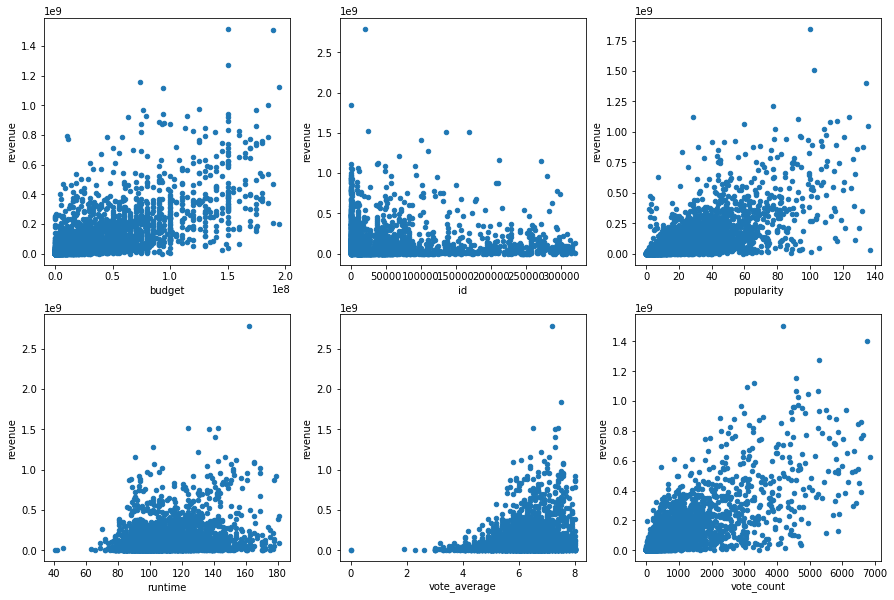

In [11]:
plt.figure(figsize=(15, 10))
numerical_col = get_columns_by_type(['int64', 'float64'], exclusion=['revenue'])
for idx, feature in enumerate(numerical_col, 1):
    plt.subplot(2, 3, idx)
    temp = raw_data[raw_data[feature] < raw_data[feature].quantile(0.99)].copy()
    temp.plot(feature, "revenue", kind="scatter", ax=plt.gca())

Vote count, budget, popularity are strongly correlated revenue.

Popularity and vote count are a strong correlation.

Moves with high revenue run about two hours (non-linear dependence). Vote_average are non_linear related with revenue

id is noninformational feature, drop it.

In [0]:
raw_data.drop(['id'], axis=1, inplace=True)

Estimate the form of distribution of features

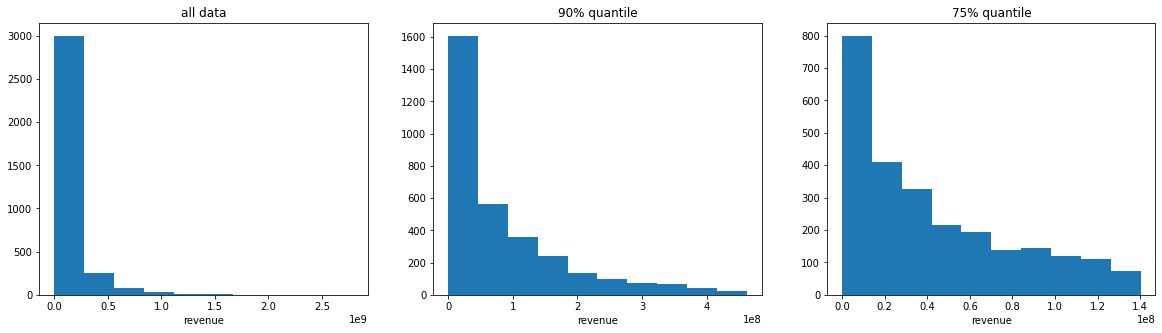

In [13]:
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
plt.hist(raw_data['revenue'])
plt.title('all data')
plt.xlabel('revenue')

plt.subplot(1, 3, 2)
plt.hist(raw_data[(raw_data['revenue'] < raw_data['revenue'].quantile(0.95))]['revenue'])
plt.title('90% quantile')
plt.xlabel('revenue')

plt.subplot(1, 3, 3)
plt.hist(raw_data[(raw_data['revenue'] < raw_data['revenue'].quantile(0.75))]['revenue'])
plt.title('75% quantile')
plt.xlabel('revenue');

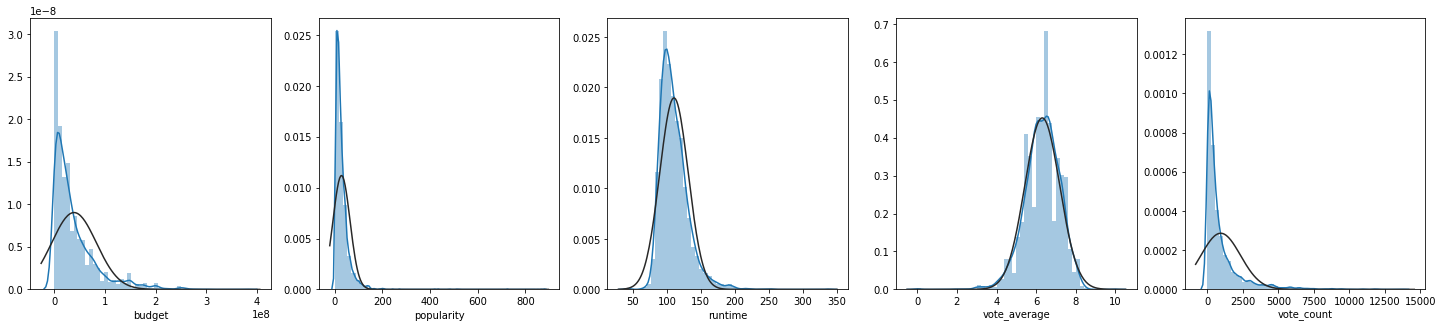

In [14]:
plt.figure(figsize=(25, 5))
numerical_col = get_columns_by_type(['int64', 'float64'], exclusion=['revenue'])
for idx, feature in enumerate(numerical_col, 1):
    plt.subplot(1, 5, idx)
    #sns.distplot(raw_data[raw_data[feature] < raw_data[feature].quantile(0.99)][feature])
    sns.distplot(raw_data[feature], fit=stats.norm)

['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']


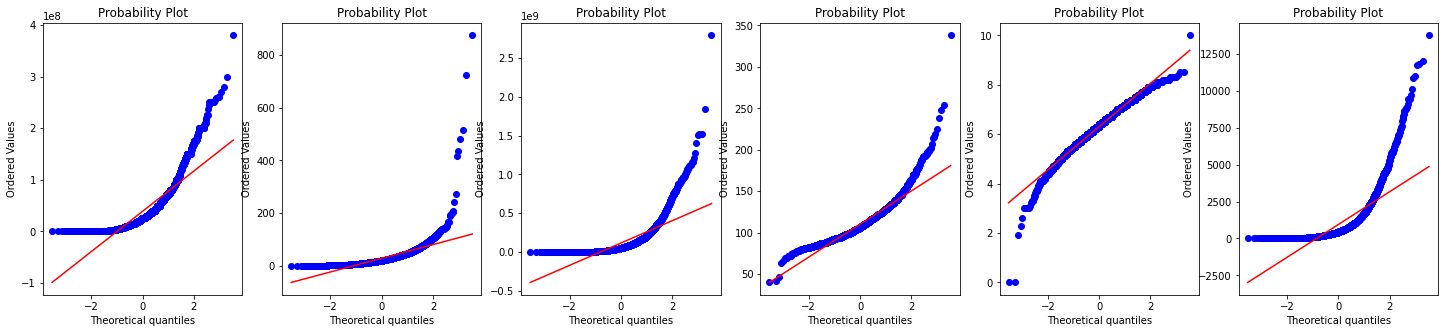

In [15]:
plt.figure(figsize=(25, 5))
numerical_col = get_columns_by_type(['int64', 'float64'])
print(numerical_col)
for idx, feature in enumerate(numerical_col, 1):
    plt.subplot(1, 6, idx)
    plt.title(feature)
    stats.probplot(raw_data[feature], plot=plt)

All numeric features are not normal and have high-value outliers. 

vote_average is most like normal distribution

# Categotical data

In [16]:
raw_data['release_date'] = pd.to_datetime(raw_data.release_date)
print('New type for release_date', raw_data['release_date'].dtype)

raw_data['release_year'] = raw_data['release_date'].dt.year
raw_data['release_month'] = raw_data['release_date'].dt.month
raw_data['release_day'] = raw_data['release_date'].dt.day
raw_data['release_dayofweek'] = raw_data['release_date'].dt.dayofweek

New type for release_date datetime64[ns]


In [0]:
def get_dict_value(row, feature, target_key='name'):
    list_ = json.loads(row[feature])
    row[feature+'_1'] = list_[0][target_key] if list_ else None
    row[feature+'_2'] = list_[1][target_key] if len(list_)>2 else None

    return row
    

In [18]:
%%time
raw_data = raw_data.apply(get_dict_value, args=('genres',), axis=1)
raw_data = raw_data.apply(get_dict_value, args=('keywords',), axis=1)
raw_data = raw_data.apply(get_dict_value, args=('production_companies',), axis=1)
raw_data = raw_data.apply(get_dict_value, args=('production_countries',), axis=1)
raw_data = raw_data.apply(get_dict_value, args=('spoken_languages', 'iso_639_1'), axis=1)

raw_data.drop(['genres', 'keywords', 'production_companies', 'production_countries', 'spoken_languages'], axis=1, inplace=True)

CPU times: user 32.3 s, sys: 29.6 ms, total: 32.3 s
Wall time: 32.3 s


In [19]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3375 entries, 0 to 4798
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   budget                  3375 non-null   int64         
 1   original_language       3375 non-null   object        
 2   popularity              3375 non-null   float64       
 3   release_date            3375 non-null   datetime64[ns]
 4   revenue                 3375 non-null   int64         
 5   runtime                 3375 non-null   float64       
 6   status                  3375 non-null   object        
 7   vote_average            3375 non-null   float64       
 8   vote_count              3375 non-null   int64         
 9   release_year            3375 non-null   int64         
 10  release_month           3375 non-null   int64         
 11  release_day             3375 non-null   int64         
 12  release_dayofweek       3375 non-null   int64   

## original_language

In [20]:
feature = 'original_language'
pd.DataFrame([raw_data[feature].value_counts(), raw_data[feature].value_counts(normalize=True)])

,en,fr,es,zh,ja,de,hi,cn,ko,ru,it,da,nl,id,th,pt,no,pl,is,xx,te,he,ro,fa,el,af,vi,nb
original_language,3232.00000,28.000000,18.000000,14.000000,13.000000,10.000000,9.000000,7.000000,7.000000,7.000000,6.000000,4.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
original_language,0.95763,0.008296,0.005333,0.004148,0.003852,0.002963,0.002667,0.002074,0.002074,0.002074,0.001778,0.001185,0.000593,0.000593,0.000593,0.000593,0.000296,0.000296,0.000296,0.000296,0.000296,0.000296,0.000296,0.000296,0.000296,0.000296,0.000296,0.000296


English is the most popular origianal language (>95%)

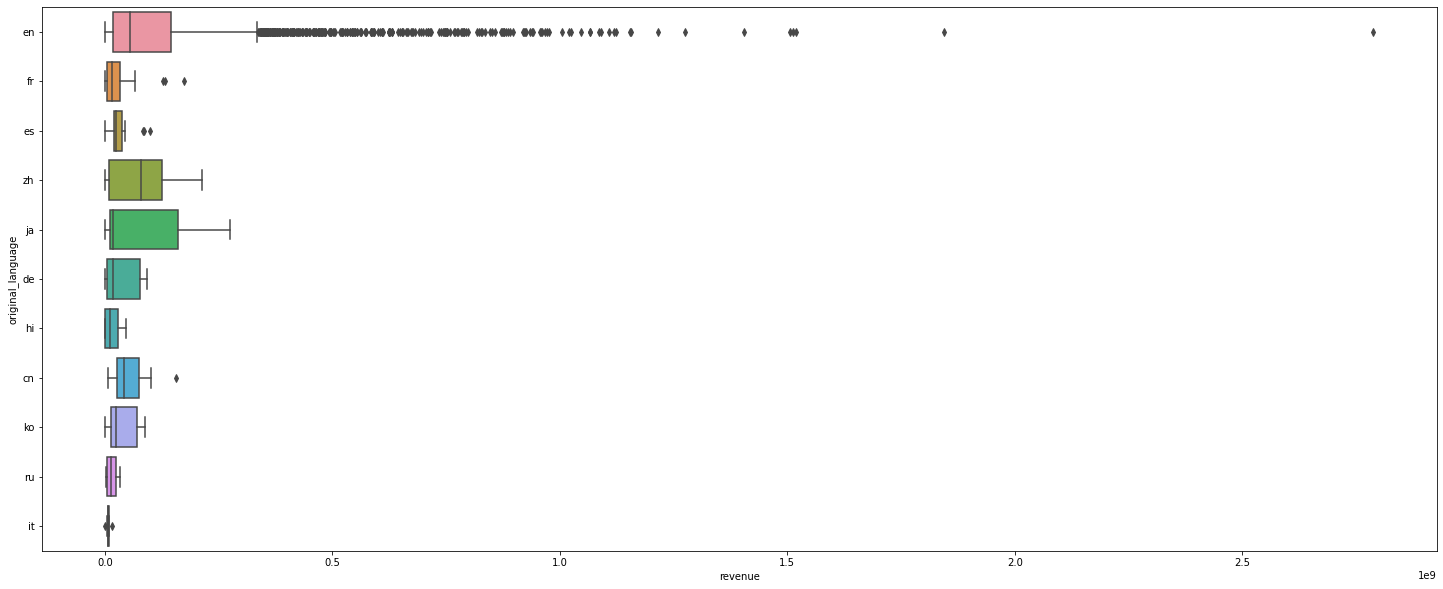

In [21]:
plt.figure(figsize=(25, 10))
target_lang = raw_data[feature].value_counts()[raw_data[feature].value_counts() >= 5].index
sns.boxplot('revenue', feature, data=raw_data[raw_data[feature].isin(target_lang)], orient='h', order=target_lang);

The highest revenue for moves in English. They are followed by moves in Chinese and Japanese. Median of Chinese moves is higher than that of moves in English. This is probably due to the large number of viewers. 

## production_countries


In [22]:
feature = 'production_countries_1'
top = 20
pd.DataFrame([raw_data[feature].value_counts(), raw_data[feature].value_counts(normalize=True)]).T.head(top)

,production_countries_1,production_countries_1
United States of America,2335.0,0.696184
United Kingdom,266.0,0.079308
Germany,149.0,0.044425
Canada,137.0,0.040847
France,117.0,0.034884
Australia,64.0,0.019082
Japan,26.0,0.007752
China,26.0,0.007752
India,24.0,0.007156
Spain,23.0,0.006857


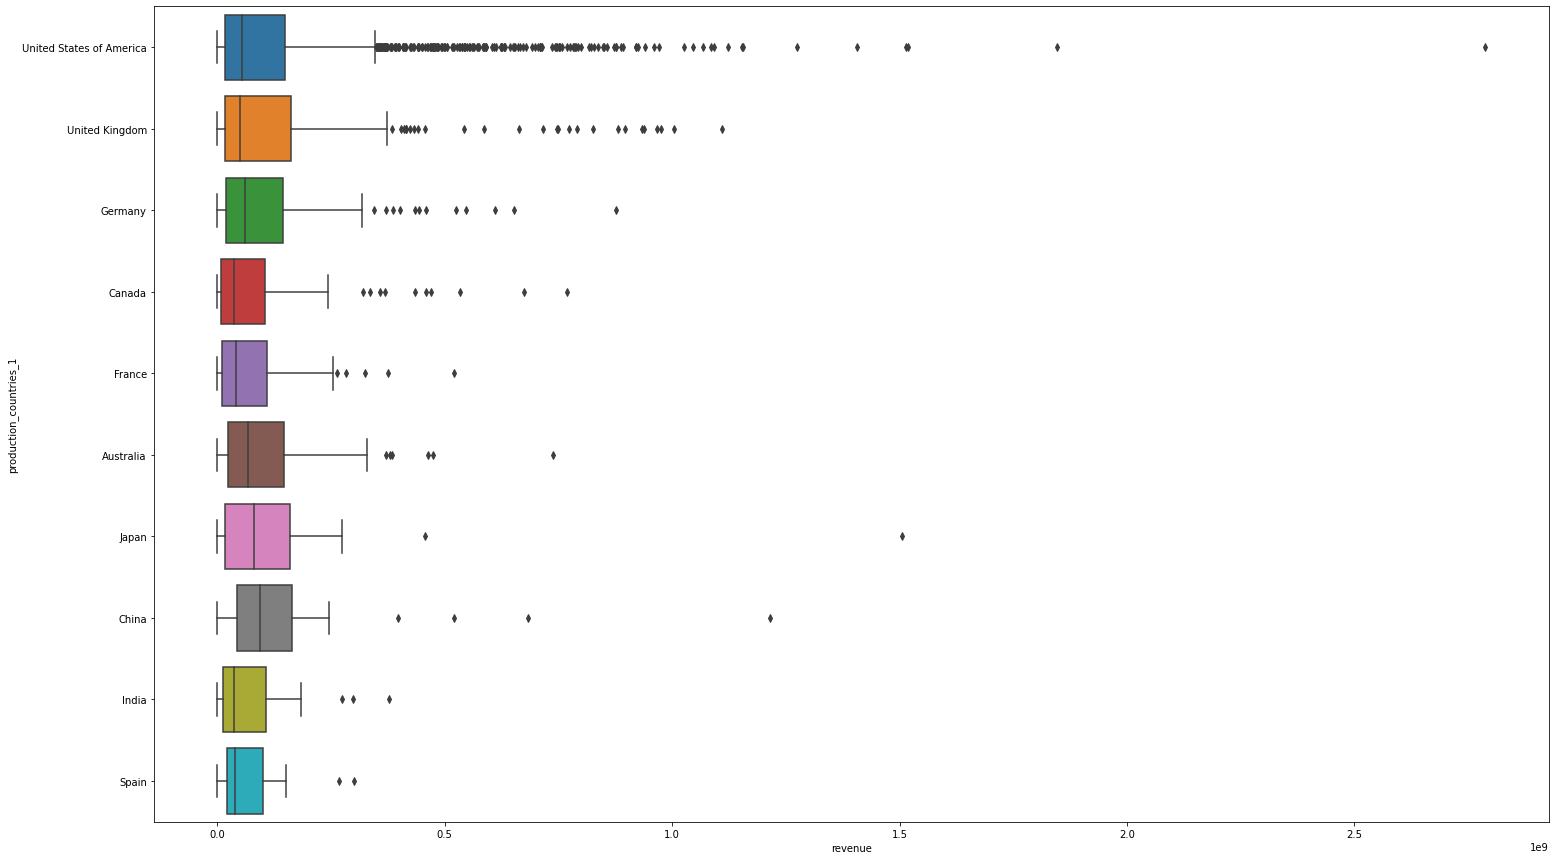

In [23]:
plt.figure(figsize=(25, 15))
target_countries = raw_data[feature].value_counts()[raw_data[feature].value_counts() >= 20].index
sns.boxplot('revenue', feature, data=raw_data[raw_data[feature].isin(target_countries)], orient='h', order=target_countries);

## genres

In [24]:
feature = 'genres_1'
pd.DataFrame([raw_data[feature].value_counts(), raw_data[feature].value_counts(normalize=True)]).T

,genres_1,genres_1
Drama,792.0,0.234736
Comedy,675.0,0.200059
Action,604.0,0.179016
Adventure,293.0,0.086841
Horror,206.0,0.061055
Crime,144.0,0.042679
Thriller,122.0,0.036159
Animation,101.0,0.029935
Fantasy,97.0,0.028749
Science Fiction,81.0,0.024007


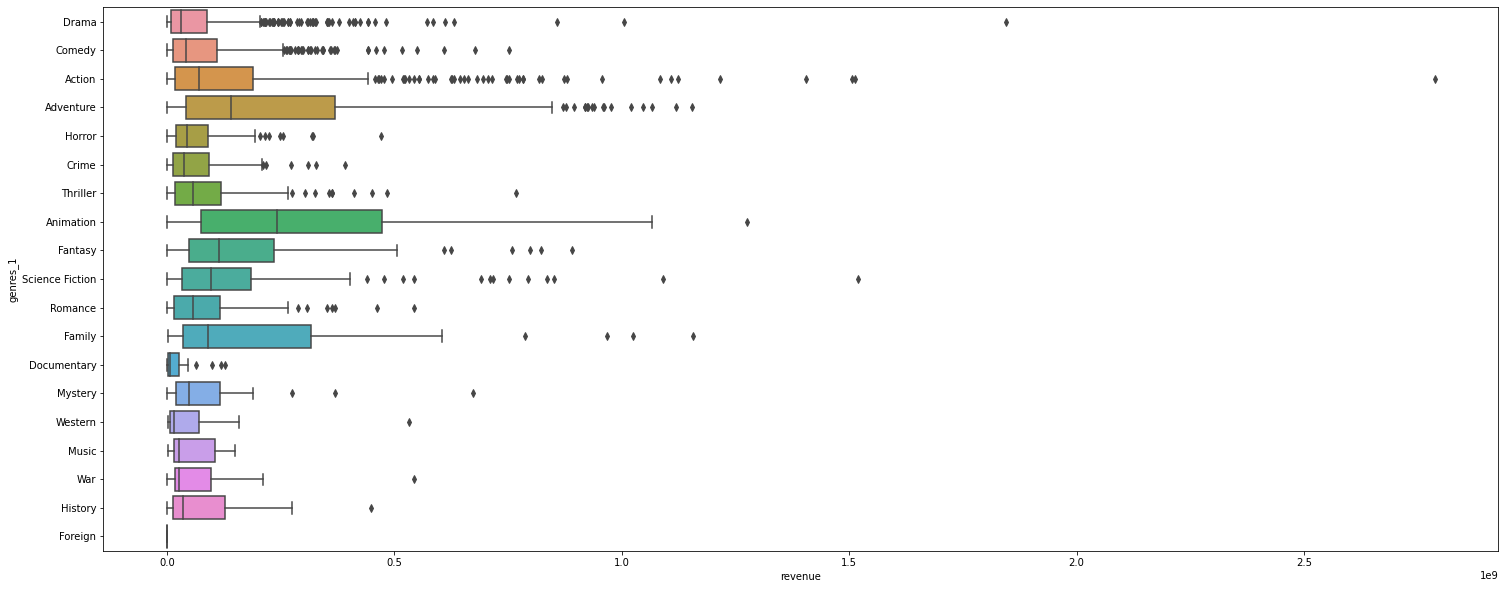

In [25]:
plt.figure(figsize=(25, 10))
target_genres = raw_data[feature].value_counts().index
sns.boxplot('revenue', feature, data=raw_data, orient='h', order=target_genres);

Animation have highest median of revenue. Drama, comedy are most popular genre and have low revenue.  Adventure, Action, Family, Fantasy, Science Fiction are have high revenue also.

## production_companies

In [26]:
feature = 'production_companies_1'
print('Total companies', raw_data[feature].unique().shape[0])

Total companies 811


In [27]:
top = 20
pd.DataFrame([raw_data[feature].value_counts(), raw_data[feature].value_counts(normalize=True)]).T.head(top)

,production_companies_1,production_companies_1
Paramount Pictures,247.0,0.074286
Universal Pictures,231.0,0.069474
Columbia Pictures,167.0,0.050226
Twentieth Century Fox Film Corporation,163.0,0.049023
New Line Cinema,137.0,0.041203
Walt Disney Pictures,100.0,0.030075
Village Roadshow Pictures,65.0,0.019549
United Artists,62.0,0.018647
Miramax Films,61.0,0.018346
Columbia Pictures Corporation,58.0,0.017444


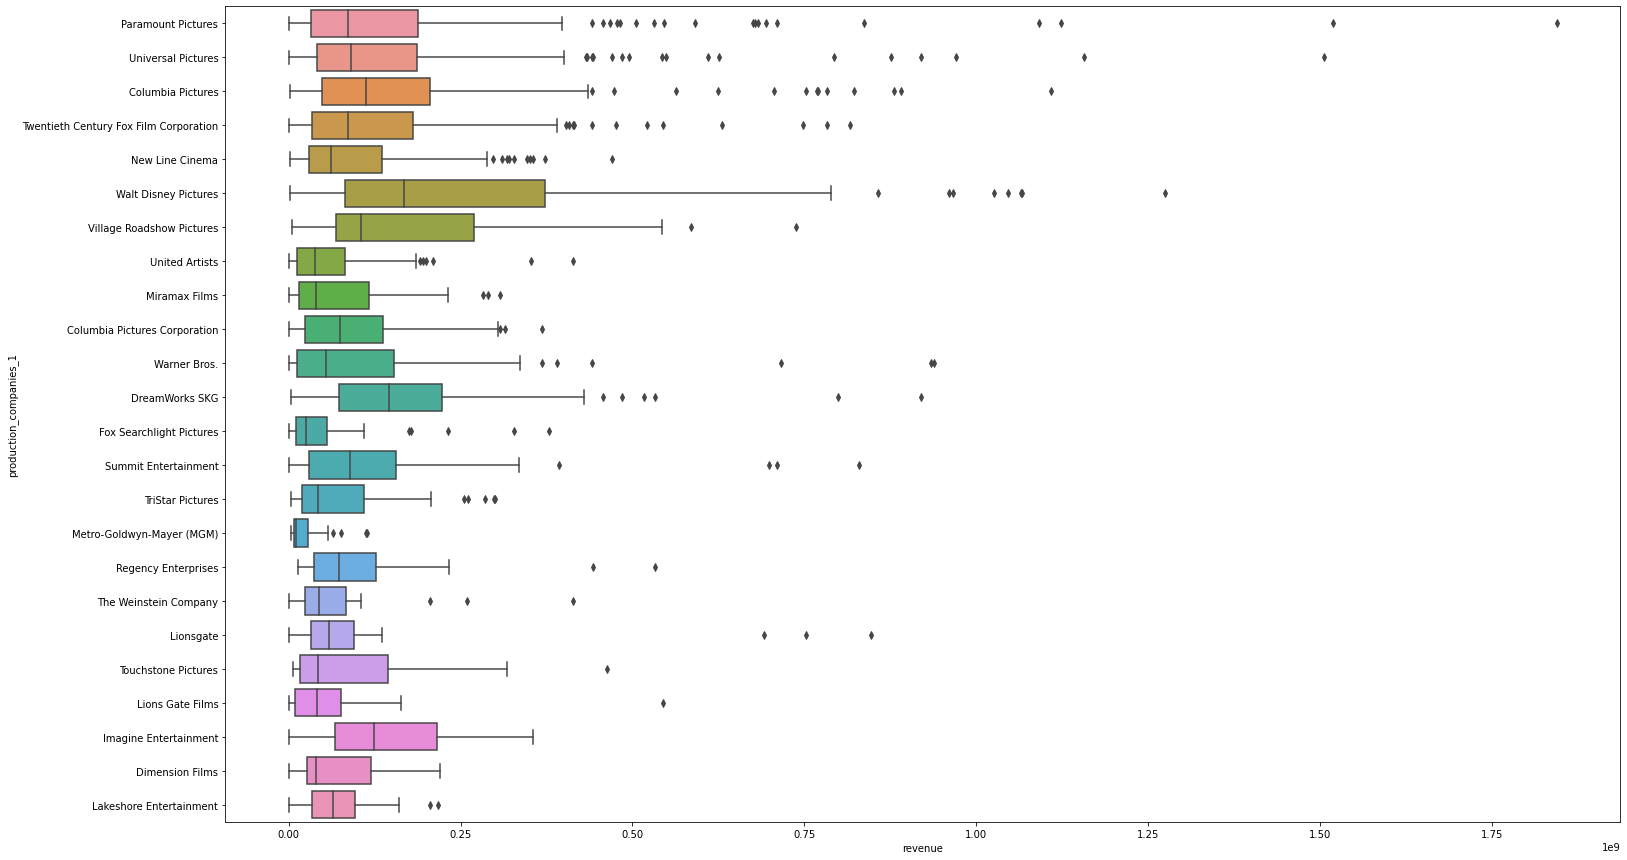

In [28]:
plt.figure(figsize=(25, 15))
target_comp = raw_data[feature].value_counts()[raw_data[feature].value_counts() >= 20].index
sns.boxplot('revenue', feature, data=raw_data[raw_data[feature].isin(target_comp)], orient='h', order=target_comp);

Disney and Village have high revenue but Disney has higher median

## status

In [29]:
feature = 'status'
pd.DataFrame([raw_data[feature].value_counts(), raw_data[feature].value_counts(normalize=True)]).T

,status,status
Released,3374.0,0.999704
Post Production,1.0,0.000296


In [0]:
raw_data = raw_data[raw_data[feature]=='Released']

## Date

In [31]:
date_col = ['release_year', 'release_month', 'release_day', 'release_dayofweek']
raw_data[date_col+['release_date']].head()

,release_year,release_month,release_day,release_dayofweek,release_date
0,2009,12,10,3,2009-12-10
1,2007,5,19,5,2007-05-19
2,2015,10,26,0,2015-10-26
3,2012,7,16,0,2012-07-16
4,2012,3,7,2,2012-03-07


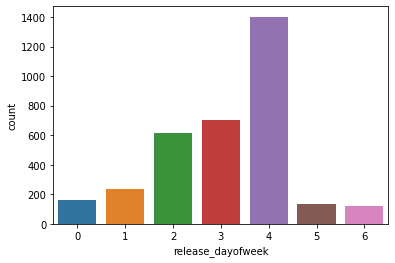

In [32]:
sns.countplot(raw_data['release_dayofweek']);

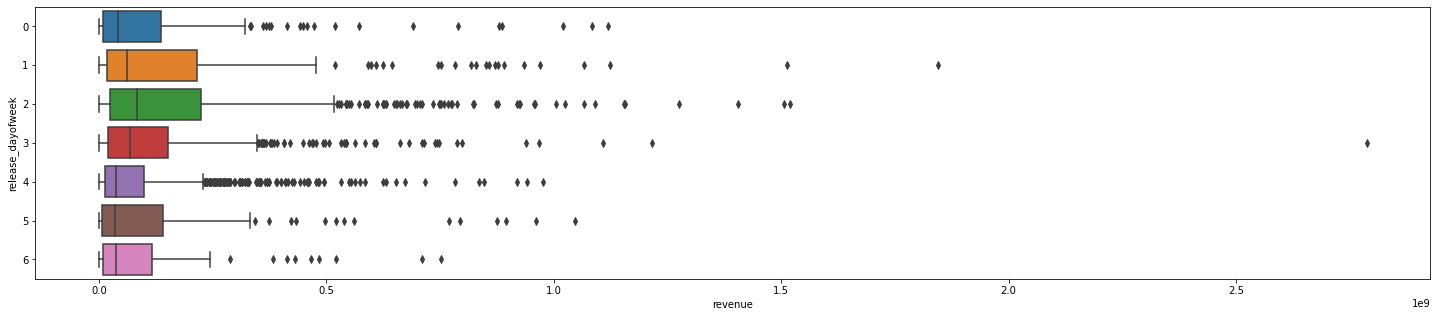

In [33]:
plt.figure(figsize=(25, 5))
sns.boxplot('revenue', 'release_dayofweek', data=raw_data, orient='h');

Most moves release on Friday but Wednesday and Tuesday have better revenue

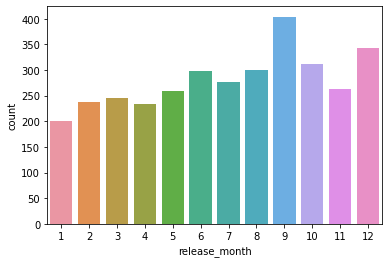

In [34]:
sns.countplot(raw_data['release_month']);

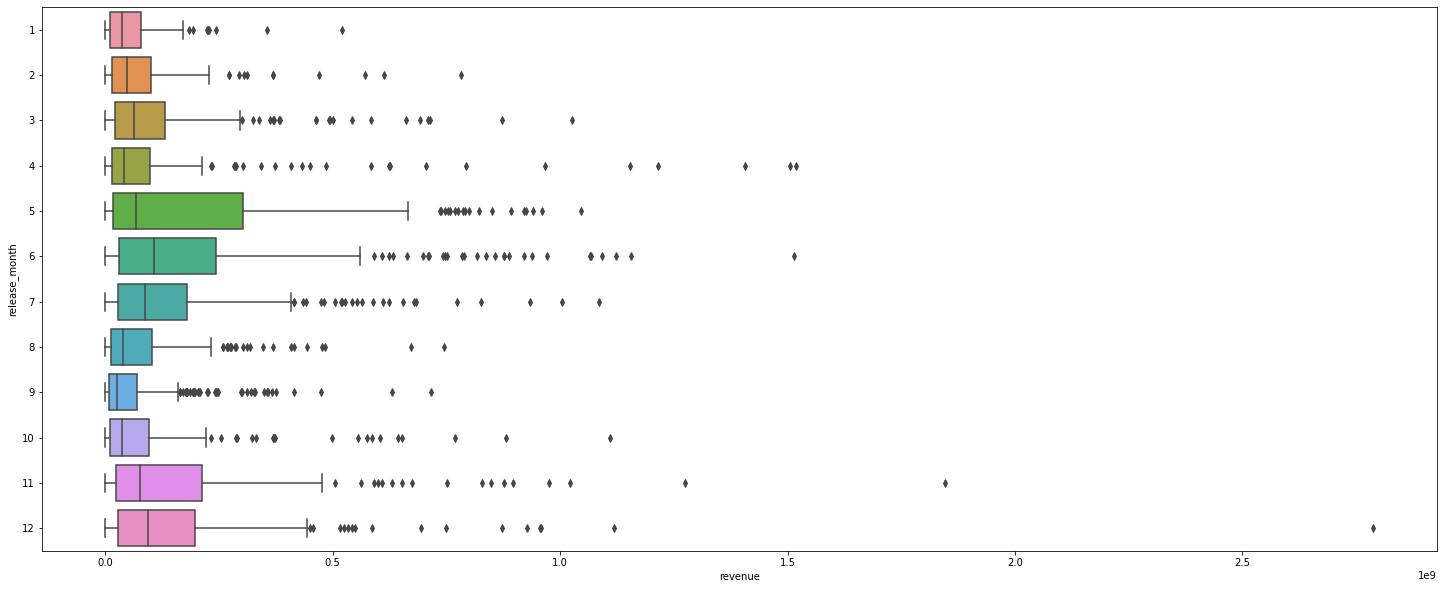

In [35]:
plt.figure(figsize=(25, 10))
sns.boxplot('revenue', 'release_month', data=raw_data, orient='h');

The secret to success is the release of the move in May, early summer or before the new year. September has many release and low revenue

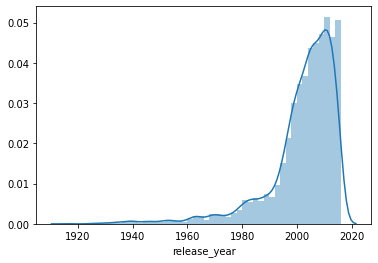

In [36]:
sns.distplot(raw_data['release_year']);

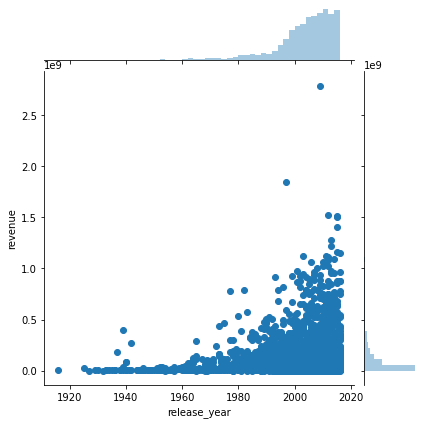

In [37]:
sns.jointplot('release_year', 'revenue', raw_data)

In the 1960s, the number of moves began to grow. 

# Сonclusions

Revenue - target variables.

Real data has a different scale.

Vote count, budget, popularity are strongly correlated revenue.

Popularity and vote count are a strong correlation.

Revenue is not normal.

Release_dayofweek, release_month, runtime and vote_average are related revenue.

Production_countries, production_companies and genres  seem to be related with revenue. However it require further exploration.

Original_language is potentially bad features.


# Just interesting

In [0]:
data = pd.read_csv('drive/My Drive/tmdb_5000_movies.csv')

Most popular movies

In [39]:
data.sort_values('popularity', ascending=False)['title'].head()

546                    Minions
95                Interstellar
788                   Deadpool
94     Guardians of the Galaxy
127         Mad Max: Fury Road
Name: title, dtype: object

Highest revenue

In [40]:
data.sort_values('revenue', ascending=False)[['title', 'revenue']].head()

,title,revenue
0,Avatar,2787965087
25,Titanic,1845034188
16,The Avengers,1519557910
28,Jurassic World,1513528810
44,Furious 7,1506249360


Higher vote_count

In [41]:
data.sort_values('vote_count', ascending=False)[['title','vote_count', 'revenue']].head()

,title,vote_count,revenue
96,Inception,13752,825532764
65,The Dark Knight,12002,1004558444
0,Avatar,11800,2787965087
16,The Avengers,11776,1519557910
788,Deadpool,10995,783112979


Higher vote_average

In [47]:
data[(data['revenue']!=0) & (data['vote_count']>1000)].sort_values('vote_average', ascending=False)[['title','vote_average', 'revenue']].head()

,title,vote_average,revenue
1881,The Shawshank Redemption,8.5,28341469
3337,The Godfather,8.4,245066411
2294,Spirited Away,8.3,274925095
662,Fight Club,8.3,100853753
2731,The Godfather: Part II,8.3,47542841


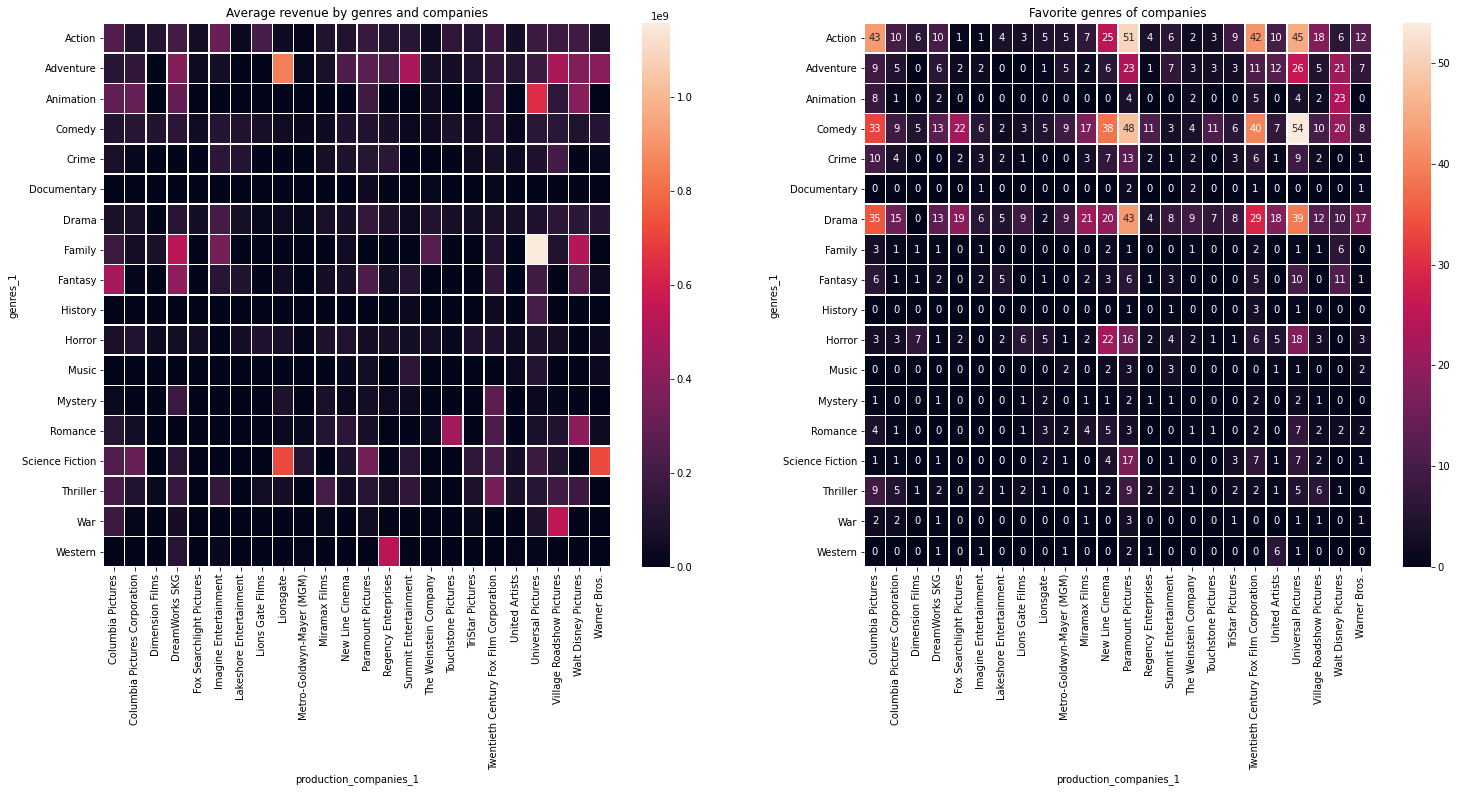

In [42]:
feature = 'production_companies_1'
target_comp = raw_data[feature].value_counts()[raw_data[feature].value_counts() >= 20].index

pivot = raw_data[raw_data['production_companies_1'].isin(target_comp)].pivot_table(
                        index='genres_1', 
                        columns='production_companies_1', 
                        values='revenue', 
                        aggfunc=np.mean).fillna(0).applymap(float)
plt.figure(figsize=(25, 10))
plt.subplot(1,2,1)
plt.title('Average revenue by genres and companies')
sns.heatmap(pivot, linewidths=.5);

platform_genre_sales = pd.crosstab(raw_data[raw_data['production_companies_1'].isin(target_comp)]['genres_1'], 
                                   raw_data[raw_data['production_companies_1'].isin(target_comp)]['production_companies_1']).fillna(0).applymap(float)
plt.subplot(1,2,2)
plt.title('Favorite genres of companies')
sns.heatmap(platform_genre_sales, linewidths=.5, annot=True);

Uninformative but beautiful